In [1]:
#import the libaries to work with
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("expenses.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

- The dataset contain 1338 rows and 7 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The dataset contain the following column: age, sex, bmi,children, smoker,region and charges.
- There are 3 categorical variable and 3 numerical variables

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- The dataset has no null value.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- The age range is between 18 and 64.
- Number of children ranges between 0 and 5. The average number of children is 1.

In [7]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

- There are total of 676 male and 662 female in the dataset.

In [9]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

- Southeast has the highest population of 364 while northeast has the lowest.

In [11]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

- Majority of the people does not smoke, only 274 are smokers.

In [12]:
df[(df.sex =='male') & (df.smoker == 'yes')].value_counts()

age  sex   bmi     children  smoker  region     charges    
18   male  17.290  2         yes     northeast  12829.45510    1
47   male  29.800  3         yes     southwest  25309.48900    1
45   male  22.895  2         yes     northwest  21098.55405    1
           30.360  0         yes     southeast  62592.87309    1
           36.480  2         yes     northwest  42760.50220    1
                                                              ..
30   male  37.800  2         yes     southwest  39241.44200    1
31   male  25.900  3         yes     southwest  19199.94400    1
           29.810  0         yes     southeast  19350.36890    1
           34.390  3         yes     northwest  38746.35510    1
64   male  36.960  2         yes     southeast  49577.66240    1
Length: 159, dtype: int64

In [13]:
df.groupby(['sex', 'smoker', 'region'])['region'].count()

sex     smoker  region   
female  no      northeast    132
                northwest    135
                southeast    139
                southwest    141
        yes     northeast     29
                northwest     29
                southeast     36
                southwest     21
male    no      northeast    125
                northwest    132
                southeast    134
                southwest    126
        yes     northeast     38
                northwest     29
                southeast     55
                southwest     37
Name: region, dtype: int64

- Southeast has the highest number of smokers(male) while Southwest has the lowest (female)

In [14]:
df.groupby(['children', 'region'])['region'].count()

children  region   
0         northeast    147
          northwest    132
          southeast    157
          southwest    138
1         northeast     77
          northwest     74
          southeast     95
          southwest     78
2         northeast     51
          northwest     66
          southeast     66
          southwest     57
3         northeast     39
          northwest     46
          southeast     35
          southwest     37
4         northeast      7
          northwest      6
          southeast      5
          southwest      7
5         northeast      3
          northwest      1
          southeast      6
          southwest      8
Name: region, dtype: int64

In [15]:
df.groupby(['sex', 'smoker'])['smoker'].count()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

- The number of male smokers is higher than female smokers.

In [16]:
df.groupby(['sex', 'region'])['region'].count()

sex     region   
female  northeast    161
        northwest    164
        southeast    175
        southwest    162
male    northeast    163
        northwest    161
        southeast    189
        southwest    163
Name: region, dtype: int64

In [17]:
df.groupby(['region'])['charges'].sum()

#Note - The Insurance Company incurs more expenses in the Southeast region.

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

- Southeast has the highest charges followed by northeast.

In [18]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [19]:
age_range = []
for row in df['age']:
        if row <=  28 :
            age_range.append('Youth')
        elif row <= 38:
            age_range.append('Young Adult')
        elif row <= 48:
            age_range.append('Adult')
        elif row <= 58:
            age_range.append('Mid-Life')
        else :
            age_range.append('Elder')
df['age_range'] = age_range

In [20]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


- A new column was created names age_range. This is divide age range into different categories.

In [21]:
df.groupby(['sex', 'smoker', 'age_range'])['age_range'].count()

sex     smoker  age_range  
female  no      Adult          109
                Elder           56
                Mid-Life       124
                Young Adult    104
                Youth          154
        yes     Adult           29
                Elder           15
                Mid-Life        14
                Young Adult     23
                Youth           34
male    no      Adult          103
                Elder           52
                Mid-Life       109
                Young Adult     97
                Youth          156
        yes     Adult           35
                Elder           16
                Mid-Life        27
                Young Adult     35
                Youth           46
Name: age_range, dtype: int64

In [22]:
df.groupby(['age_range', 'sex'])['charges'].sum()

age_range    sex   
Adult        female    1.886071e+06
             male      2.070274e+06
Elder        female    1.441249e+06
             male      1.453422e+06
Mid-Life     female    2.071209e+06
             male      2.282091e+06
Young Adult  female    1.297333e+06
             male      1.706693e+06
Youth        female    1.625199e+06
             male      1.922284e+06
Name: charges, dtype: float64

In [23]:
df.groupby(['age_range'])['charges'].sum()

age_range
Adult          3.956346e+06
Elder          2.894671e+06
Mid-Life       4.353299e+06
Young Adult    3.004026e+06
Youth          3.547483e+06
Name: charges, dtype: float64

- The observation shows that the company spent more on mid-life category followed by adult.

In [24]:
df.groupby(['smoker', 'age_range'])['age_range'].count()

smoker  age_range  
no      Adult          212
        Elder          108
        Mid-Life       233
        Young Adult    201
        Youth          310
yes     Adult           64
        Elder           31
        Mid-Life        41
        Young Adult     58
        Youth           80
Name: age_range, dtype: int64

- Majority of the people does not smoke and the higest category of people that smokes is youth followed by adult and young adult.

In [25]:
df.groupby(['sex'])['charges'].sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

- The company spent more money on male customer than female.

### Univariate Analysis

<AxesSubplot:>

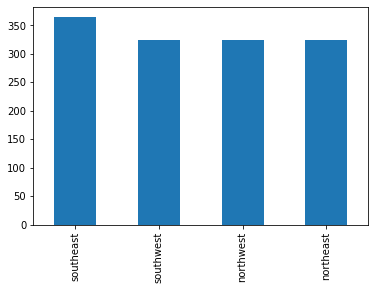

In [26]:
df.region.value_counts().plot.bar()

<Figure size 432x288 with 0 Axes>

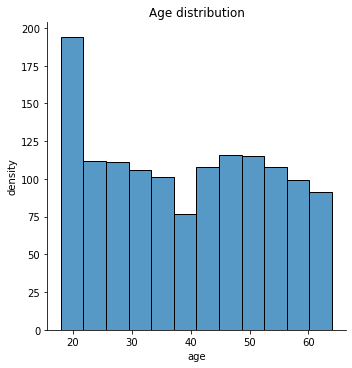

In [27]:
fig = plt.figure(figsize = (6,4))
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

<AxesSubplot:ylabel='region'>

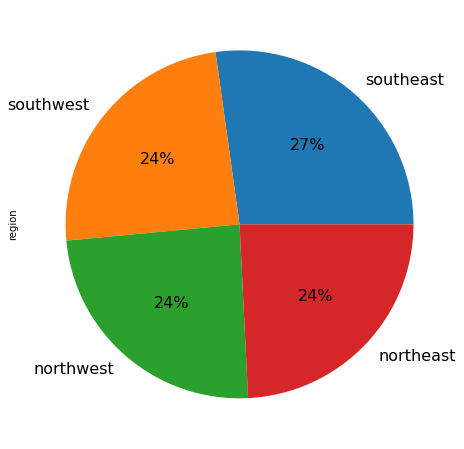

In [28]:
df.region.value_counts().plot(kind='pie', y='region', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<Figure size 432x288 with 0 Axes>

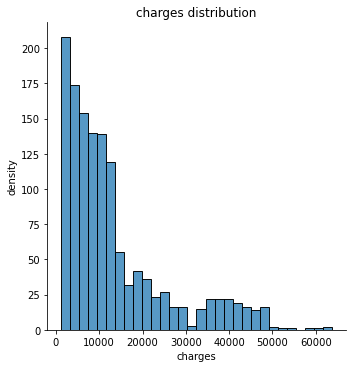

In [29]:
fig = plt.figure(figsize = (6,4))
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

<AxesSubplot:>

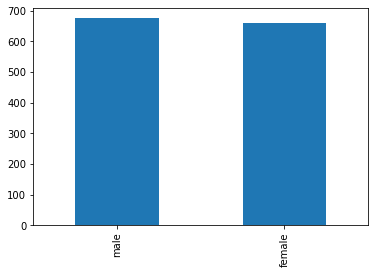

In [30]:
df.sex.value_counts().plot.bar()

<Figure size 432x288 with 0 Axes>

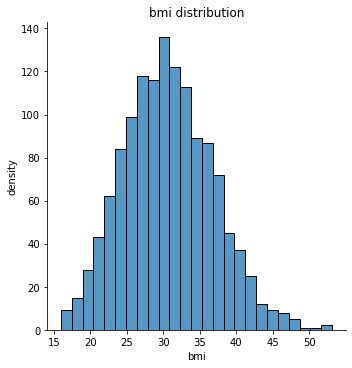

In [31]:
fig = plt.figure(figsize = (6,4))
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

<AxesSubplot:ylabel='sex'>

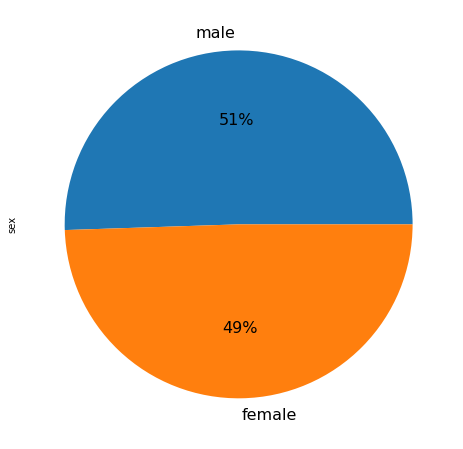

In [32]:
df.sex.value_counts().plot(kind='pie', y = 'sex', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

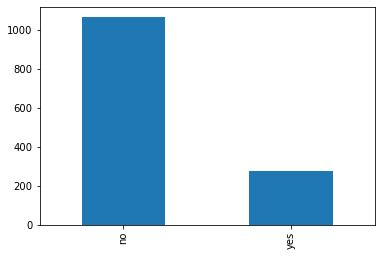

In [33]:
df.smoker.value_counts().plot.bar()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


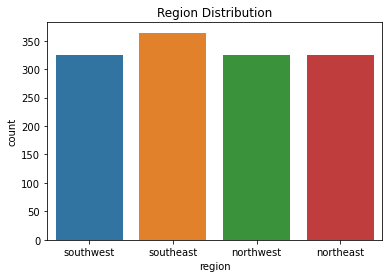

In [34]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('Region Distribution')
plt.show()

<AxesSubplot:ylabel='smoker'>

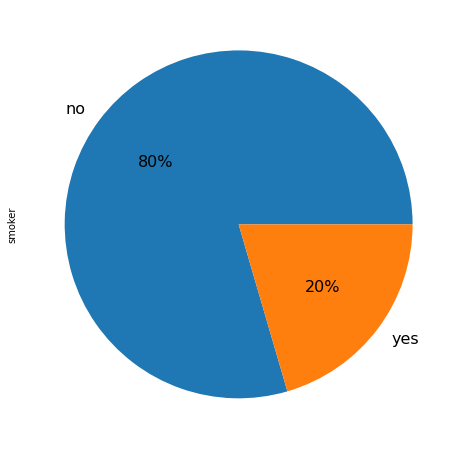

In [35]:
df.smoker.value_counts().plot(kind='pie', y = 'smoker', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


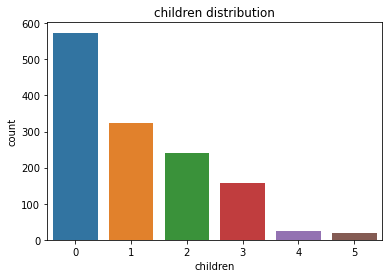

In [36]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['children'])
plt.title('children distribution')
plt.show()

<AxesSubplot:ylabel='children'>

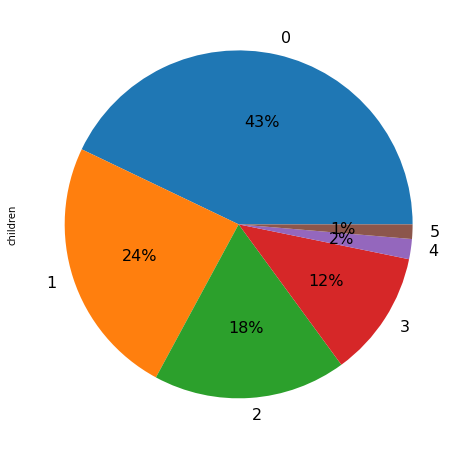

In [37]:
df.children.value_counts().plot(kind='pie', y = 'children', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:>

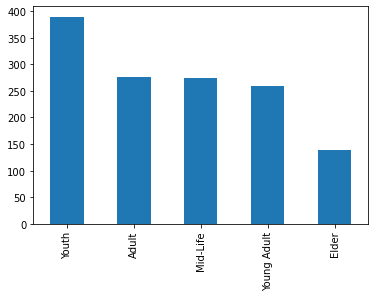

In [38]:
df.age_range.value_counts().plot.bar()

<AxesSubplot:ylabel='age_range'>

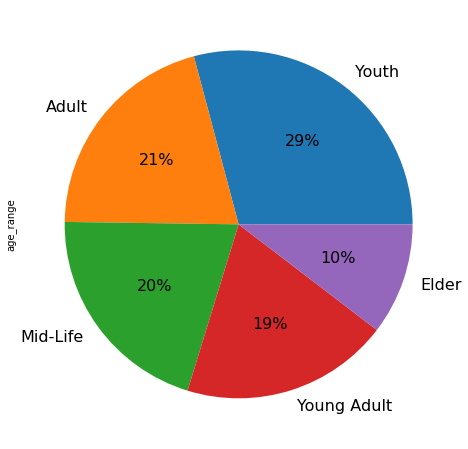

In [39]:
df.age_range.value_counts().plot(kind='pie', y = 'age_range', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

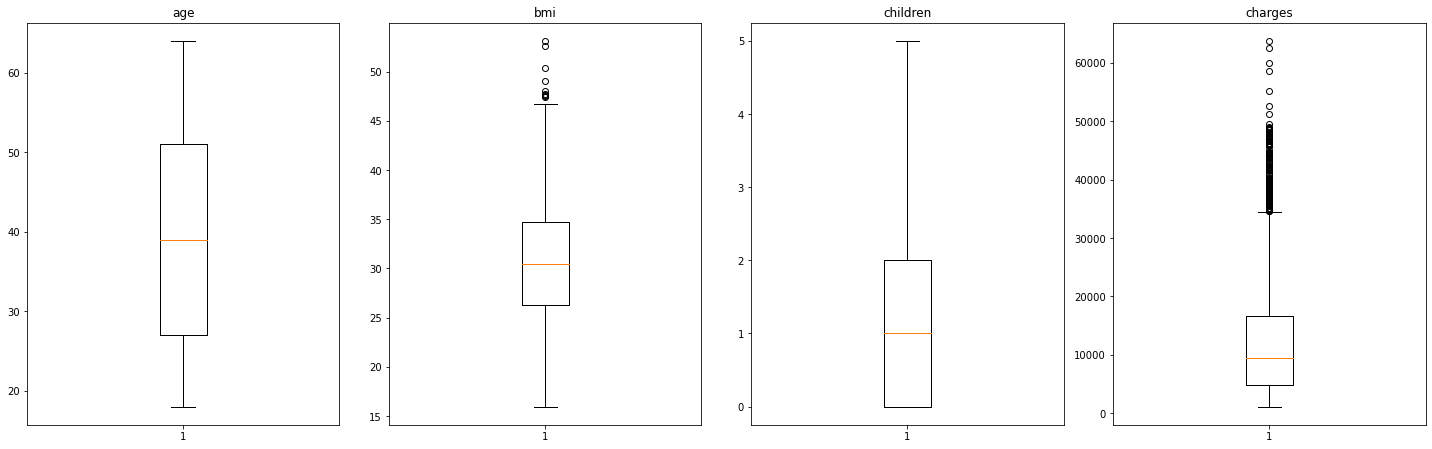

In [40]:
# outlier detection using boxplot
#Create box plots for features with numeric data 

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- There are few outliers in bmi and charges.

### Multivariate Analysis

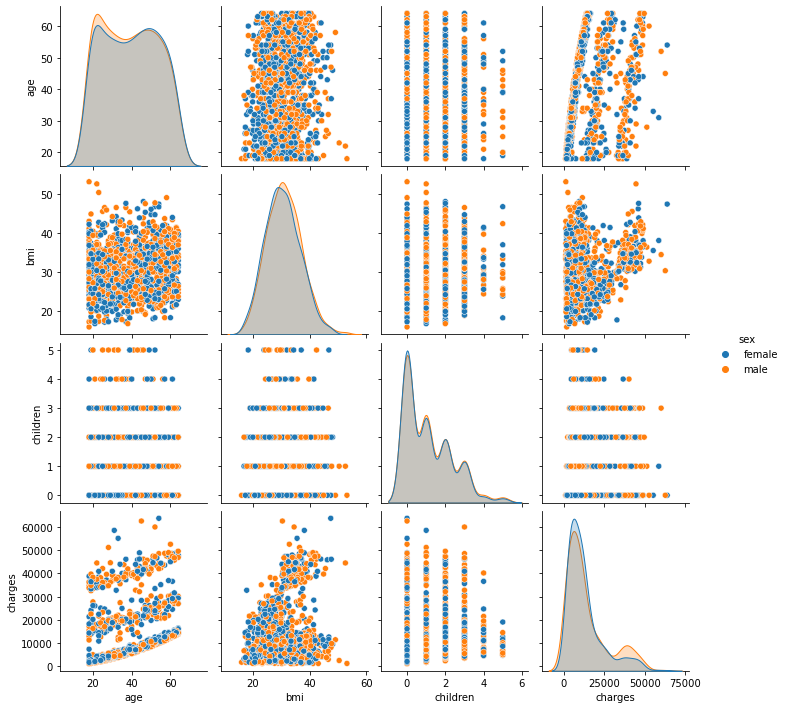

In [41]:
#sns.pairplot(data = df)
sns.pairplot(data=df,hue='sex')

In [42]:
#Encode categorical variables using Label Encoding 

from sklearn.preprocessing import LabelEncoder
df_transf=df.copy()
#sex
le = LabelEncoder()
le.fit(df_transf.sex.drop_duplicates()) 
df_transf.sex = le.transform(df_transf.sex)

# smoker or not
le.fit(df_transf.smoker.drop_duplicates()) 
df_transf.smoker = le.transform(df_transf.smoker)

#region
le.fit(df_transf.region.drop_duplicates()) 
df_transf.region = le.transform(df_transf.region)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


In [44]:
#Encode categorical variables using Label Encoding 

from sklearn.preprocessing import LabelEncoder
df_transf=df.copy()
#sex
le = LabelEncoder()
le.fit(df_transf.sex.drop_duplicates()) 
df_transf.sex = le.transform(df_transf.sex)

# smoker or not
le.fit(df_transf.smoker.drop_duplicates()) 
df_transf.smoker = le.transform(df_transf.smoker)

#region
le.fit(df_transf.region.drop_duplicates()) 
df_transf.region = le.transform(df_transf.region)

In [45]:
df_transf.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [46]:
#Correlation Heatmap

df_transf.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

C:\Users\OD\AppData\Local\Temp\ipykernel_20324\2419944268.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

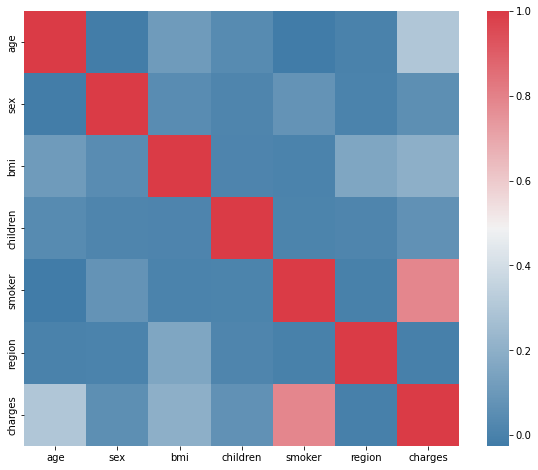

In [47]:
#Plot your heatmap 

f, ax = plt.subplots(figsize=(10, 8))
corr = df_transf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

- There is a high correlation between smokers and charges which makes a lot of sense, since smokers are prone to different sickness.

In [48]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot


C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


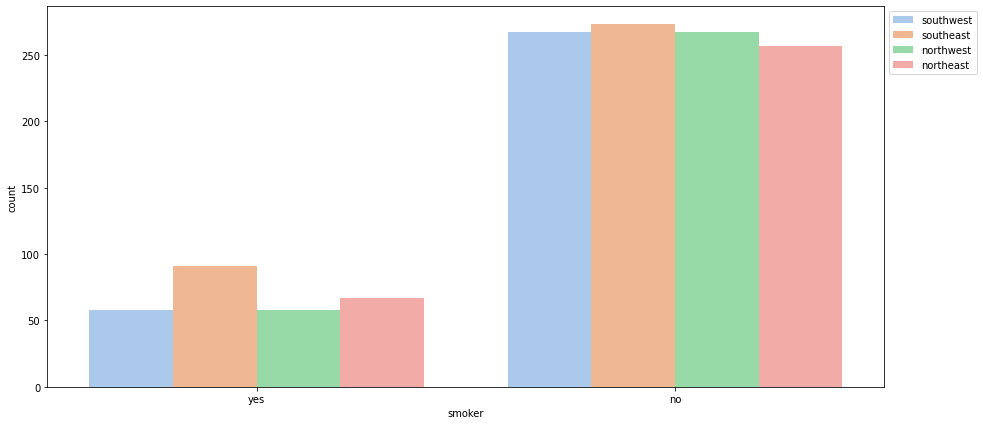

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(df["smoker"],hue=df["region"],palette='pastel')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


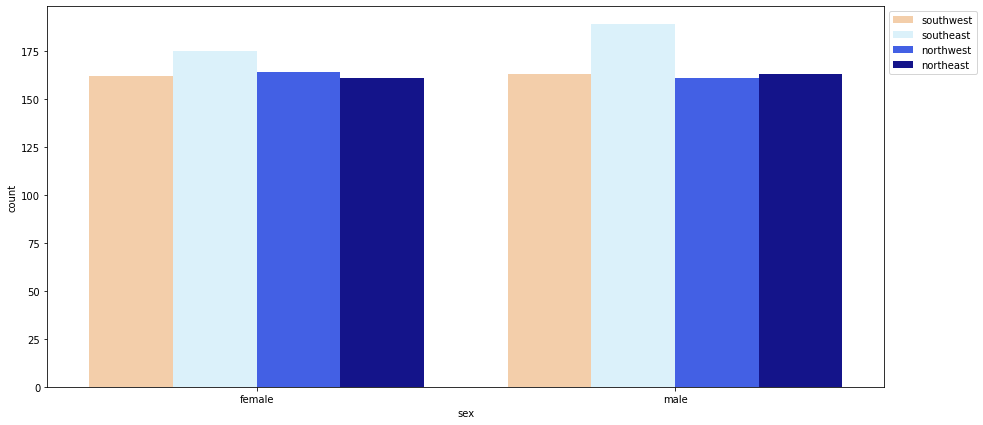

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(df["sex"],hue=df["region"],palette='flag')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


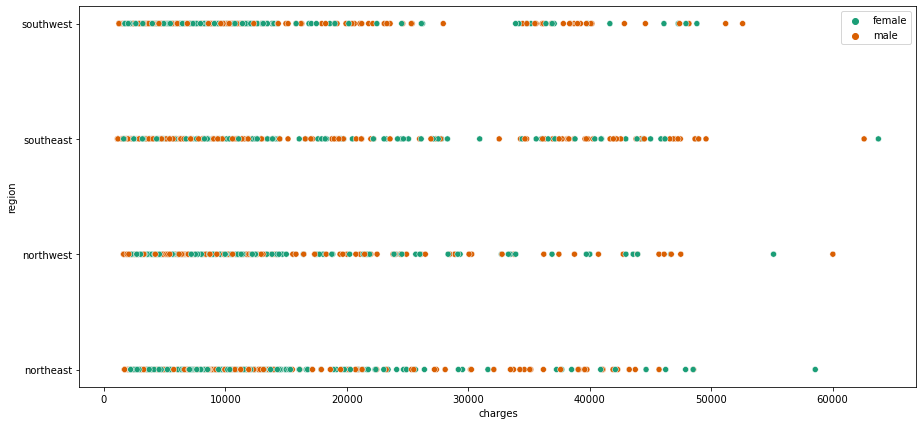

In [51]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["charges"],df["region"],hue=df["sex"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


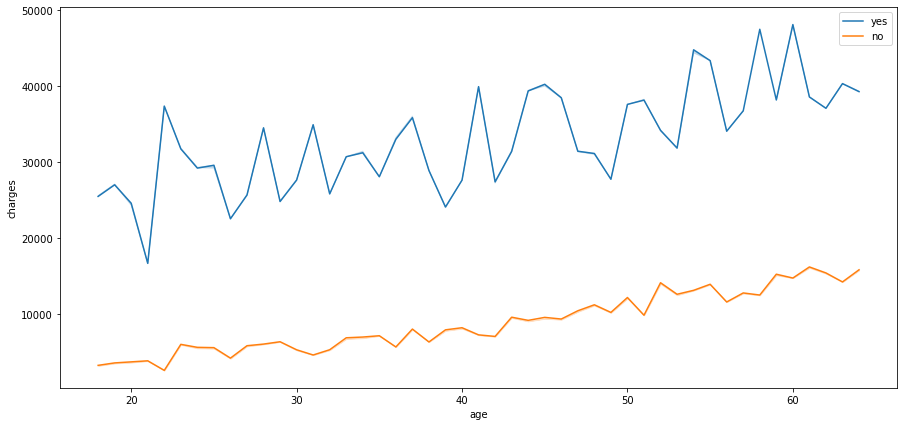

In [52]:
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["smoker"],ci=2)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


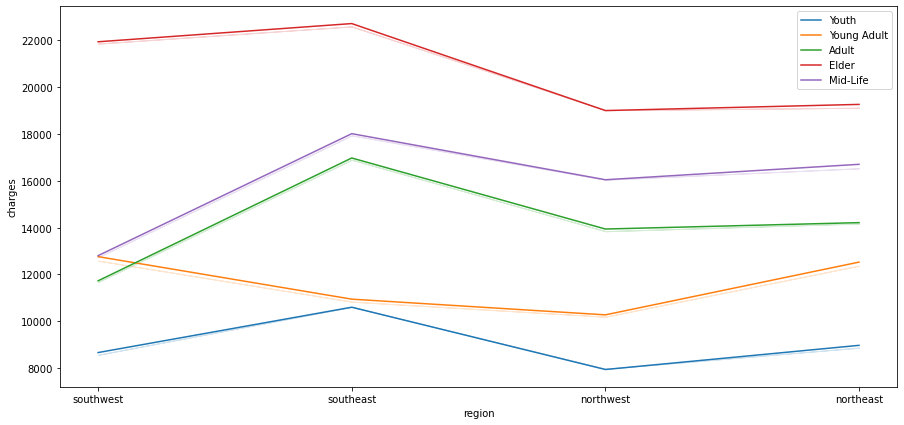

In [53]:
plt.figure(figsize=(15,7))
sns.lineplot(df["region"],df["charges"],hue=df["age_range"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

C:\Users\OD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


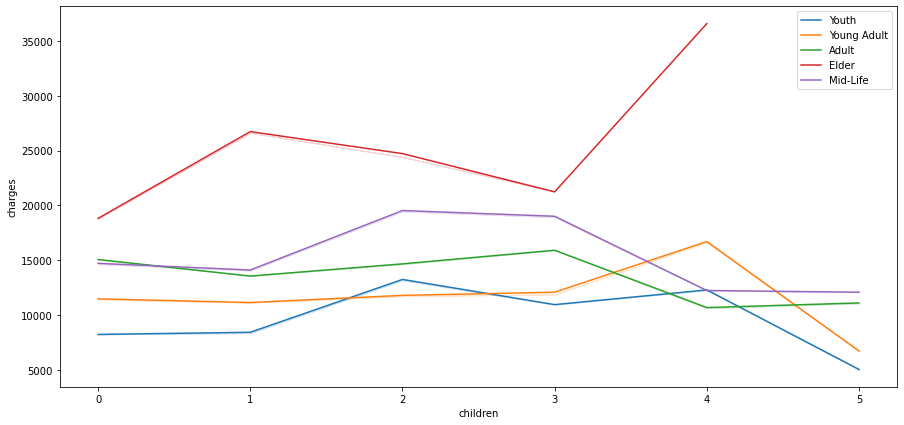

In [54]:
plt.figure(figsize=(15,7))
sns.lineplot(df["children"],df["charges"],hue=df["age_range"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<AxesSubplot:xlabel='age_range,sex'>

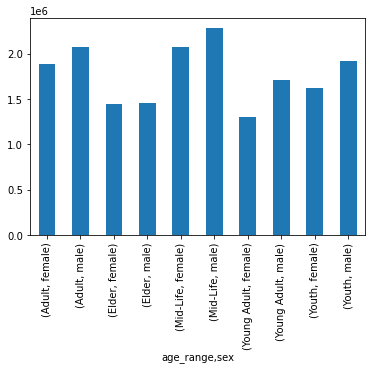

In [55]:
df.groupby(['age_range', 'sex'])['charges'].sum().plot.bar()

<AxesSubplot:ylabel='charges'>

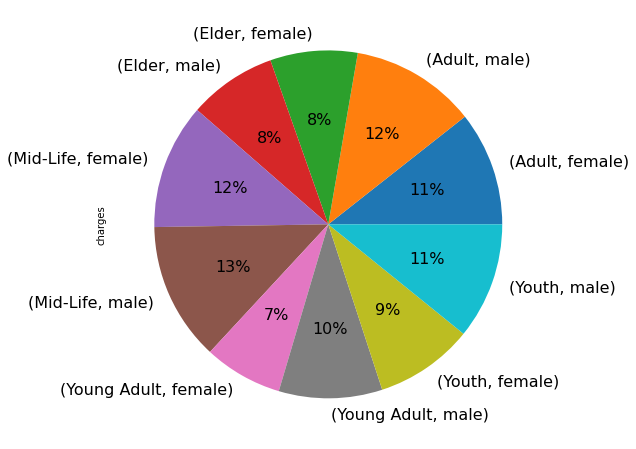

In [56]:
df.groupby(['age_range', 'sex'])['charges'].sum().plot(kind='pie', y = 'age_range', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:ylabel='charges'>

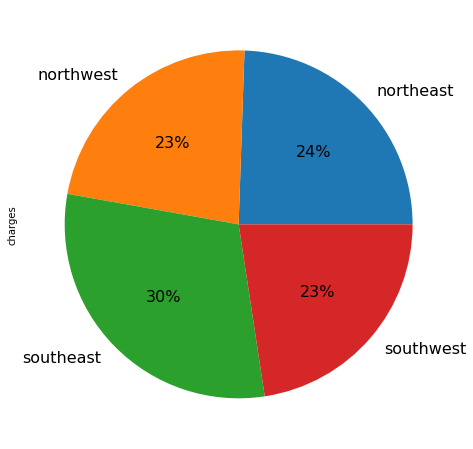

In [57]:
df.groupby(['region'])['charges'].sum().plot(kind='pie', y = 'region', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

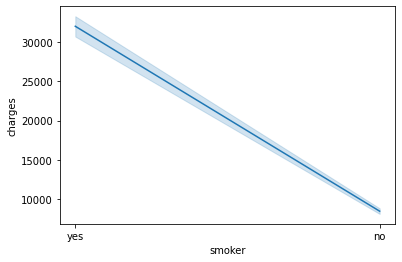

In [58]:
sns.lineplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='age_range', ylabel='charges'>

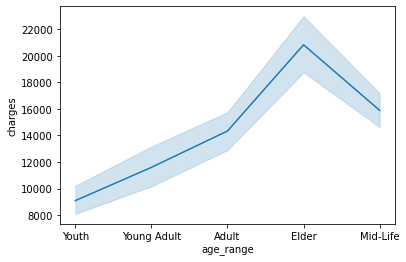

In [59]:
sns.lineplot(x='age_range',y='charges',data=df)

### Insights:
- The data provided shows the difference between smokers and non-smokers with respect to insurance charges paid by both males and females.
- It was observed that there are higher numbers of non-smokers in each region which means the proportion of smokers in each region is very low when compared to non-smokers.
- In each age range, the population of non-smokers is higher than that of smokers, with the highest set of smokers aged 19.
- It is Observed that older people with 1 to 4 children, and high BMI will pay higher insurance charges/claims.
- It is also observed that the BMI of women fluctuate based on number of children birthed.
- In conclusion, it was also observed that the medical claims/charges made by the people who smoke is greater than that of the non-smokers.
- The mean BMI of women with no children, one child and two children are not the same. Statistical evidence show that women with no child have a BMI of less than 30.5
- The women with 1 child has mean BMI of 30.05.
- The women with 2children have mean BMI 30.64.
- Insurance Charges for smokers are generally higher than non-smokers, worthy of note is the fact that smokers who are 60years of age pay the highest insurance charges.
- For Non-Smokers, increase in age is directly proportional to increase in insurance charges, and these charges are very low when compared to the insurance charges of smokers.


### Recommendations:
- They should target midlife ppl more, they include less charges on them
-  Create a package to get more women on board
- Create family packages in areas with less subscription
- ACME HMO is advised to re-negotiate the current charges with the care providers (hospitals) or get new hospital with same quality (perhaps better quality) but with a lesser  charge in order to make more profit.
